In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
distances = np.array([
    [0, 29, 20, 21, 16], 
    [29, 0, 15, 19, 28], 
    [20, 15, 0, 13, 25],  
    [21, 19, 13, 0, 17],  
    [16, 28, 25, 17, 0]   
])

num_cities = distances.shape[0]

In [3]:
def initialize_population(size=100):
    population = []
    for _ in range(size):
        path = np.random.permutation(num_cities).tolist()
        path.append(path[0]) 
        population.append(path)
    return population

In [4]:
def calculate_fitness(path):
    return sum(distances[path[i], path[i + 1]] for i in range(len(path) - 1))

In [5]:
def select_parents(population, fitnesses):
    max_fitness = np.max(fitnesses)
    adjusted_fitnesses = max_fitness - fitnesses + 1
    probabilities = adjusted_fitnesses / adjusted_fitnesses.sum()
    parents = random.choices(population, weights=probabilities, k=2)
    return parents

In [6]:
def crossover(parent1, parent2):
    cut = random.randint(1, num_cities - 1)
    child = parent1[:cut] + [city for city in parent2 if city not in parent1[:cut]]
    child.append(child[0]) 
    return child

In [7]:
def mutate(path, mutation_rate=0.1):
    path = path[:-1] 
    if random.random() < mutation_rate:
        i, j = random.sample(range(num_cities), 2)
        path[i], path[j] = path[j], path[i]
    path.append(path[0]) 
    return path

In [10]:
def genetic_algorithm(iterations=1000, population_size=100):
    population = initialize_population(population_size)
    best_path = None
    best_distance = float('inf')
    distance_progress = [] 
    
    for _ in range(iterations):
        fitnesses = np.array([calculate_fitness(p) for p in population])
        current_best_idx = np.argmin(fitnesses)
        if fitnesses[current_best_idx] < best_distance:
            best_distance = fitnesses[current_best_idx]
            best_path = population[current_best_idx]
        
        distance_progress.append(best_distance) 
        
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = select_parents(population, fitnesses)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        
        population = new_population

    return best_path, best_distance, distance_progress

Best path: [2, 3, 1, 5, 4, 2]
Best distance: 87


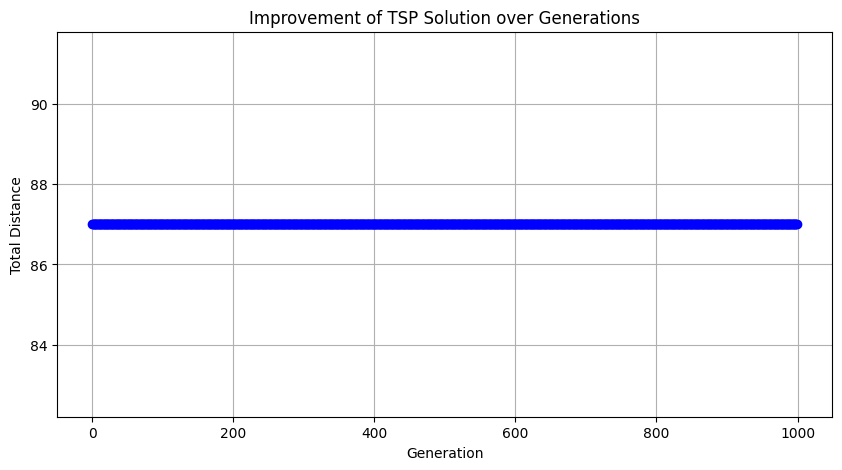

In [11]:
def plot_progress(distance_progress):
    plt.figure(figsize=(10, 5))
    plt.plot(distance_progress, marker='o', linestyle='-', color='b')
    plt.title('Improvement of TSP Solution over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Total Distance')
    plt.grid(True)
    plt.show()

best_path, best_distance, distance_progress = genetic_algorithm()
print("Best path:", [x + 1 for x in best_path]) 
print("Best distance:", best_distance)
plot_progress(distance_progress)